In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  

In [10]:
def get_missings(df,plot=True,rotation=45,figsize=(10,5), * kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0]) * 100)
        #Make a dataframe 
        missings=pd.DataFrame({'Columns':labels,'MissingValues':values,'MissingPercentage':percent}).sort_values(by='MissingPercentage',ascending=False)
        

        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Columns,y=round(missings.MissingPercentage, 2), palette = "tab20")# .set_title('Porcentaje de valores perdidos',size=22)
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Columnas',size=18)
            plt.ylabel('Porcentaje',size=18)
            plot.set_title('Porcentaje de valores nulos',size=18)

        return missings
    else:
        return 'No se encontraron valores nulos.'

# **Tabla:** Countries Population
### Diccionario
| | Normalized Column Name | Normalized Data Type | Original Column Name | Original Data Type | Description |
|:---:|---|---|---|---|---|
| 0 | country_name | str | country | str | Contiene el nombre del país |
| 1 | country_code | str | countryiso3code | str | Contiene el código del país |
| 2 | year | int | date | int | Contiene el año del registro |
| 3 | population | float | value | float | Contiene el número de habitantes del país |

# Carga de los datos

In [2]:
data_frame = pd.read_csv('./Data/raw_data.csv')

In [33]:
data_frame.shape

(16492, 8)

In [ ]:
data_frame['value']

In [34]:
data_frame['value'].describe()

count    1.638700e+04
mean     2.131655e+08
std      7.006673e+08
min      2.833000e+03
25%      9.660195e+05
50%      6.749849e+06
75%      4.626525e+07
max      7.836631e+09
Name: value, dtype: float64

In [43]:
data_frame[data_frame['value'].isna()]

,Unnamed: 0,country_name,countryiso3code,date,value,unit,obs_status,decimal
2170,20,North America,NaN,2021,NaN,NaN,NaN,0
2171,21,North America,NaN,2020,NaN,NaN,NaN,0
2172,22,North America,NaN,2019,NaN,NaN,NaN,0
2173,23,North America,NaN,2018,NaN,NaN,NaN,0
2174,24,North America,NaN,2017,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
16301,1,West Bank and Gaza,PSE,1964,NaN,NaN,NaN,0
16302,2,West Bank and Gaza,PSE,1963,NaN,NaN,NaN,0
16303,3,West Bank and Gaza,PSE,1962,NaN,NaN,NaN,0
16304,4,West Bank and Gaza,PSE,1961,NaN,NaN,NaN,0


# La distribucion no es normal

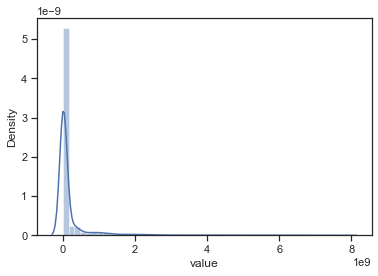

In [44]:
sns.distplot(data_frame['value'].dropna());

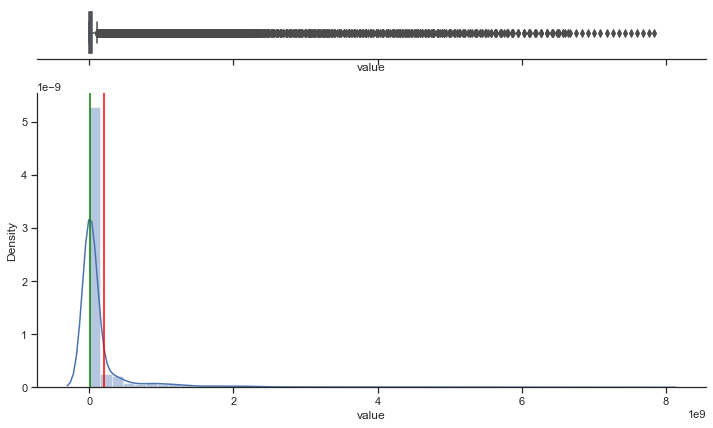

Skewness: 5.542986
Kurtosis: 36.802156


In [37]:
sns.set(style="ticks")
x = data_frame['value']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,7))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()
print("Skewness: %f" % data_frame['value'].skew())
print("Kurtosis: %f" % data_frame['value'].kurt())

# Aplico logaritmo para visualizar la distribucion como normal

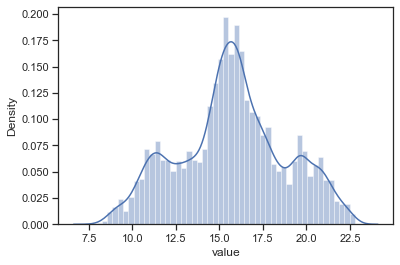

In [46]:
sns.distplot(np.log1p(data_frame['value'].dropna()));

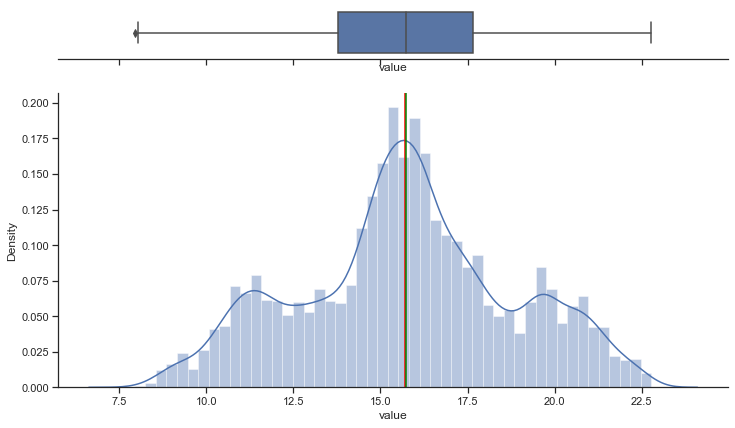

Skewness: 5.542986
Kurtosis: 36.802156


In [47]:
sns.set(style="ticks")
x = np.log1p(data_frame['value'].dropna())
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,7))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()
print("Skewness: %f" % data_frame['value'].skew())
print("Kurtosis: %f" % data_frame['value'].kurt())

In [ ]:
sns.heatmap()

In [31]:
data_frame.head()

,Unnamed: 0,country_name,countryiso3code,date,value,unit,obs_status,decimal
0,0,Africa Eastern and Southern,AFE,2021,694665117.0,NaN,NaN,0
1,1,Africa Eastern and Southern,AFE,2020,677243299.0,NaN,NaN,0
2,2,Africa Eastern and Southern,AFE,2019,660046272.0,NaN,NaN,0
3,3,Africa Eastern and Southern,AFE,2018,643090131.0,NaN,NaN,0
4,4,Africa Eastern and Southern,AFE,2017,626392880.0,NaN,NaN,0


In [5]:
data_frame.columns

Index(['Unnamed: 0', 'country_name', 'countryiso3code', 'date', 'value',
       'unit', 'obs_status', 'decimal'],
      dtype='object')

In [26]:
data_frame.dtypes

Unnamed: 0           int64
country_name        object
countryiso3code     object
date                 int64
value              float64
unit               float64
obs_status         float64
decimal              int64
dtype: object

In [30]:
data_frame['date'].max()

2021

In [28]:
data_frame[data_frame['decimal'] != 0]

,Unnamed: 0,country_name,countryiso3code,date,value,unit,obs_status,decimal


In [32]:
data_frame.drop(columns = ['Unnamed: 0', 'unit', 'obs_status', 'decimal'])

,country_name,countryiso3code,date,value
0,Africa Eastern and Southern,AFE,2021,694665117.0
1,Africa Eastern and Southern,AFE,2020,677243299.0
2,Africa Eastern and Southern,AFE,2019,660046272.0
3,Africa Eastern and Southern,AFE,2018,643090131.0
4,Africa Eastern and Southern,AFE,2017,626392880.0
...,...,...,...,...
16487,Zimbabwe,ZWE,1964,4322854.0
16488,Zimbabwe,ZWE,1963,4178726.0
16489,Zimbabwe,ZWE,1962,4039209.0
16490,Zimbabwe,ZWE,1961,3905038.0


,Columns,MissingValues,MissingPercentage
2,unit,16492,100.000000
3,obs_status,16492,100.000000
0,countryiso3code,310,1.879699
1,value,105,0.636672


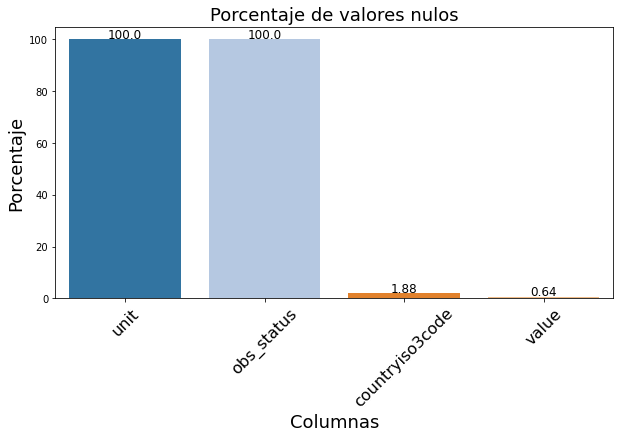

In [11]:
get_missings(data_frame)